In [1]:
from geopy.geocoders import Nominatim
import pandas as pd
import folium
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import colorsys

In [2]:
client = MongoClient('localhost', 27017)
db = client['Final_Year_Project']
collection = db['user_data']

# Retrieve data from the MongoDB collection
data = pd.DataFrame(list(collection.find()))

In [3]:
data

,_id,User_Name,User_Age,Login_Country,Login_City,Email_Address,Occupation,Organization,Name_of_Portable_file,Time_of_Access,File_type
0,64509346478a6f97c7b867f4,Abhiroop Sarkar,15,India,Mumbai,ads@gmail.com,student,GHRCE,oop11.exe,02 May 2023 10:06:22,malicious
1,6450942f478a6f97c7b867f5,Saurabh Barse,16,India,Aurangabad,sbs@gmail.com,student,GHRCE,Array.exe,02 May 2023 10:10:15,malicious
2,645094c0478a6f97c7b867f6,Adnan Quraishee,15,India,Nagpur,adq@gmail.com,student,ITC,class.exe,02 May 2023 10:12:40,malicious
3,6450ae3a478a6f97c7b867f7,Dylan O Brien,31,Australia,Bairnsdale,dob@gmail.com,employed,Deloitte,Practical3.exe,02 May 2023 12:01:22,malicious
4,6450e44b51fcea91b44095d2,Samuel Dhobiwala,46,Germany,Munich,sda@outlook.com,employed,CIA,SBS.exe,02 May 2023 15:52:03,malicious
5,64539f939960dc843f63bb54,Ram Kumar Badodiya,54,India,Patna,rkb@outlook.com,unemployed,TCS,func.exe,04 May 2023 17:35:39,benign
6,645411881505584e7085a074,Laura Dhawan,32,UK,London,ldn@outlook.com,employed,Target,SBS.exe,05 May 2023 01:41:52,benign
7,64548a7d02386f0c231c6139,Tom Pamecha,42,Russia,Novosibirsk,tpa@gmail.com,employed,H&M,func.exe,05 May 2023 10:17:57,benign
8,645491db72f4d35d9bd4c962,Karen Shetty,34,USA,Texas,ksy@yahoo.com,student,TU,Array.exe,05 May 2023 10:49:23,benign
9,645493110a8b4a320520c554,Rahul Wan,14,USA,New York,rwn@gmail.com,student,NYU,Practical3.exe,05 May 2023 10:54:33,benign


In [4]:
viz_data = pd.DataFrame()

In [5]:
def get_lat_long(city, country):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(f"{city}, {country}")
    if location:
        return (location.latitude, location.longitude)
    else:
        return (None,None)

In [6]:
data["user_latitude"] = data.apply(lambda data: get_lat_long(data["Login_City"], data["Login_Country"])[0], axis=1)
data["user_longitude"] = data.apply(lambda data: get_lat_long(data["Login_City"], data["Login_Country"])[1], axis=1)

In [7]:
viz_data = data

In [8]:
viz_data["hour"] = pd.to_datetime(data["Time_of_Access"]).dt.hour

In [10]:
viz_data.to_csv("Viz_data.csv")

In [9]:
def create_grouped_data(data, group_cols):
    # Define the fixed column for file_type
    file_type_col = 'File_type'

    # Group the data by the specified group columns and file_type
    grouped_data = data.groupby(group_cols + [file_type_col]).size().reset_index(name='count')
    
    grouped_data = grouped_data[grouped_data['count'] != 0]
    # Return the grouped data
    return grouped_data,group_cols

In [11]:
grouped_data,inputted_cols = create_grouped_data(data, ['Age_Groups','Login_Country'])

In [10]:
grouped_data

NameError: name 'grouped_data' is not defined

In [96]:
data.columns

Index(['_id', 'User_Name', 'User_Age', 'Login_Country', 'Login_City',
       'Email_Address', 'Occupation', 'Organization', 'Name_of_Portable_file',
       'Time_of_Access', 'File_type', 'user_latitude', 'user_longitude',
       'hour', 'Age_Groups'],
      dtype='object')

In [13]:
fig = px.scatter(data, x='user_longitude', y='user_latitude', size='User_Age', color='File_type', hover_name='User_Name')

# Add a legend title
fig.update_layout(legend_title_text='File Type')

# Show the plot
fig.show()

In [20]:
import numpy as np

In [23]:
z = data['hour']
colors = np.random.rand(24) 


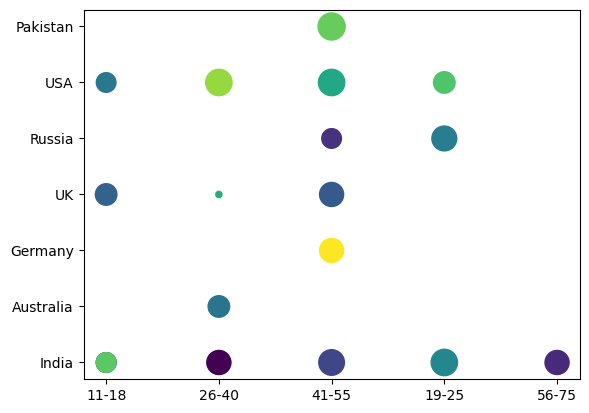

In [24]:
plt.scatter(x = data['Age_Groups'],y = data['Login_Country'],s=z*20,c = colors)


In [14]:
def plot(data,columns):
    # colors = ['#8B0000', 'Blue', 'Green', '#4B0082','#6B0060']
    # colors = ['#1f77b4', '#b45500', '#2ca02c', '#910f0f', '#9467bd', '#4b2b1f', '#e377c2', '#4d4d4d', '#bcbd22', '#17becf']
    colors = ['#17414f', '#ff7f0e', '#234d20', '#d62728', '#4e2d53', '#8c564b', '#9d4f76', '#7f7f7f', '#7f8500', '#11727f']

    fig = go.Figure(go.Bar(
        x=data['File_type'],
        y=data['count'],
        text=data[columns].apply(lambda row: '<br>'.join(f"{col}: {val}" for col, val in row.items()), axis=1),
        hovertemplate='%{text}<br>File type: %{x}<br>Count: %{y}<extra></extra>',
        marker=dict(
            color=[colors[i % len(colors)] for i in range(len(data))], # Set the colors for each bar
            line=dict(color='gray', width=1), # Set the outline color and width for each bar
        )
    ))

    # Set the chart title and axis labels
    fig.update_layout(title='File Types Count', xaxis_title='File Types', yaxis_title='Count')

    # Show the chart
    fig.show()


In [15]:
plot(grouped_data,inputted_cols)

In [16]:
fig = px.density_mapbox(viz_data, lat='user_latitude', lon='user_longitude', zoom=2, 
                        mapbox_style='open-street-map', center=dict(lat=viz_data['user_latitude'].mean(), 
                        lon=viz_data['user_longitude'].mean()), opacity=0.5, radius=10)

fig.update_layout(title='Your Map Title')

fig.show()

In [8]:
bins = [11, 19, 26, 41, 56, 76]
labels = ['11-18', '19-25', '26-40', '41-55', '56-75']

# create a new column 'Ranged_user' that contains the age ranges
data['Age_Groups'] = pd.cut(data['User_Age'], bins=bins, labels=labels, include_lowest=True)

# count the values in each bin
